# Elbow

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
from scipy.sparse import csr_matrix
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

#import matplotlib.pyplot as plt

	
import matplotlib.pylab as plt



import matplotlib.cm as cm
import numpy as np

ModuleNotFoundError: No module named 'yellowbrick'

## Backup

In [ ]:
def elbow_method(matrix, lower, upper, seed=None):
    # Plot the distortions for each potential value of k
    distortions = []
    K = range(lower,upper)

    for k in K:
        model = KMeans(k, random_state=seed)
        model.fit(matrix)
        distortions.append(model.inertia_)
    
    plt.figure(figsize=(16,8))
    plt.plot(K, distortions, 'xb-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method with optimal k')
    
    return plt.show()

elbow_method(TFIDF_matrix, 3, 10, seed=6)

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
from kneed import KneeLocator
#import matplotlib.pyplot as plt
#import matplotlib.cm as cm
#import numpy as np

In [ ]:
list(range(2, 5))

In [ ]:
import random
import matplotlib.patches as mpatches
from varname import nameof

In [ ]:
 random.randrange(10)

In [ ]:
from kneed import KneeLocator, DataGenerator as dg
x, y = dg.convex_decreasing()
kl = KneeLocator(x, y, curve="convex", direction="decreasing")
kl.plot_knee()

Seed: 4188493


NameError: name 'argname' is not defined

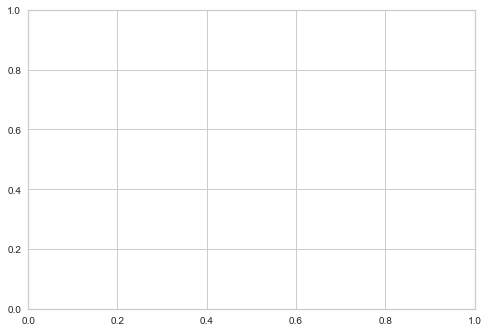

In [85]:
import random
def elbow_method(matrix, lower, upper, seed=None, knee=True):

    distortions = []
    silhouettes = []
    
    # Set Seed
    if not seed:
        seed = random.randrange(10000000)
    print (f'Seed: {seed}')
    K = range(lower,upper)

    for k in K:
        model = KMeans(k, random_state=seed)
        labels = model.fit_predict(matrix)
        silhouette_avg = silhouette_score(matrix, labels)
        silhouettes.append(silhouette_avg)
        distortions.append(model.inertia_)

    def bestk_plot(axis, x, y, color, draw_knee=True, curve=None, direction=None, twinx=None):
        if twinx:
            ax = axis.twinx()
        else:
            ax = axis
            ax.set_xlabel(argname('x'))
        ax.set_ylabel(argname('y'), color=color)
        ax.plot(x, y, color=color, label=argname('y'))
        ax.set_yticks(np.linspace(axis.get_ybound()[0], axis.get_ybound()[1],5))
        ax.tick_params(axis='y', labelcolor=color)
        if draw_knee:
            # https://kneed.readthedocs.io/en/stable/parameters.html
            kneedle = KneeLocator(
                x = x,
                y = y,
                curve = curve, 
                direction = direction, 
                online = True, 
                interp_method = "interp1d", #Valid arguments are “interp1d” and “polynomial”.
                polynomial_degree = 7 #Default
            ) 
            print (kneedle.knee)
            ax.axvline(kneedle.knee, color=color, linestyle="--", label=f'k={kneedle.knee}')
            
        return ax
        
    fig, ax1 = plt.subplots()
    
    ax1 = bestk_plot(ax1, K, distortions, 'tab:red', draw_knee=True, curve='convex', direction='decreasing')
    #ax2 = bestk_plot(ax1, K, silhouettes, 'tab:blue', True,'concave', 'increasing', twinx=True)
    ax3 = ax1.twinx()
    text(0.5, 0.5, 'matplotlib', horizontalalignment='center', verticalalignment='center', transform=ax3.transAxes)
    fig.tight_layout()
    
    #text(0.5, 1, f'Seed: {seed}', horizontalalignment='left', verticalalignment='bottom', transform=fig.transFigure)
    
     	
    plt.legend(loc="center left")

    return plt.show()

elbow_method(TFIDF_matrix, 2, 7)

In [ ]:
    fig, ax1 = plt.subplots()
    # Plot Distortions
    color = 'tab:red'
    ax1.set_xlabel('k (s)')
    ax1.set_ylabel('Distortion', color=color)
    ax1.plot(K, distortions, color=color)
    ax1.set_yticks(np.linspace(ax1.get_ybound()[0], ax1.get_ybound()[1], 5))
    ax1.tick_params(axis='y', labelcolor=color)
    if knee:
        distortion_knee = KneeLocator(K, distortions, S=1.0, curve="convex", direction="decreasing")
        ax1.axvline(distortion_knee.knee, color=color, linestyle="--", label=f'k={distortion_knee.knee}')
    

    # Plot Silhouettes
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
    ax2.set_ylabel('Silhouettes', color=color)  # we already handled the x-label with ax1
    ax2.plot(K, silhouettes, color=color)
    ax2.set_yticks(np.linspace(ax2.get_ybound()[0], ax2.get_ybound()[1], 5))
    ax2.tick_params(axis='y', labelcolor=color)
    if knee:
        silhouette_knee = KneeLocator(K, silhouettes, S=1.0, curve="concave", direction="increasing")
        ax2.axvline(silhouette_knee.knee, color=color, linestyle="--", label=f'k={silhouette_knee.knee}')

In [ ]:
    #plt.figure(figsize=(16,8))
    #plt.plot(K, distortions, 'xb-')
    #plt.plot(K, silhouettes, 'xr-')
    #plt.xlabel('k')
    #plt.ylabel('Distortion')
    #plt.title('The Elbow Method with optimal k')

    fig, ax1 = plt.subplots()

    # Plot Distortions
    color = 'tab:red'
    ax1.set_xlabel('k (s)')
    ax1.set_ylabel('Distortion', color=color)
    ax1.plot(k, distortions, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    # Plot Silhouettes
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
    ax2.set_ylabel('Silhouettes', color=color)  # we already handled the x-label with ax1
    ax2.plot(k, silhouettes, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped

    return plt.show()

In [87]:
def elbow_method(matrix, lower, upper, seed=None):
    # Plot the distortions for each potential value of k
    distortions = []
    silhouettes = []
    
    K = range(lower,upper)

    for k in K:
        model = KMeans(k, random_state=seed)
        labels = model.fit(matrix)
        silhouette_avg = silhouette_score(matrix, labels)
        silhouettes.append(silhouette_avg)
        distortions.append(model.inertia_)
    
    plt.figure(figsize=(16,8))
    plt.plot(K, distortions, 'xb-')
    plt.plot(K, silhouettes, 'xr-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method with optimal k')
    
    return plt.show()


    for k in K:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.



    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [82]:
elbow_method(TFIDF_matrix,2,3)

ValueError: y should be a 1d array, got an array of shape () instead.